In [1]:
from openai import OpenAI
import numpy as np 
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

In [2]:
client = OpenAI()

# EXPERIMENT 2
The structure of this file is nearly identical to the related file in the `exp1` folder. We do not show all comments here.

In [3]:
# Loading in data:
exp2_stimuli = pd.read_csv('experiment2stimuli.csv')

In [4]:
exp2_stimuli.head()

,linebreaks,rhyme,shownword,poem_number,condition,stimuli
0,yes,no,others,a,OTHER (LINEBREAK),"At speaking my mind,\n I'm one of the best.\n ..."
1,yes,yes,rest,a,POEM,"At speaking my mind,\n I'm one of the best.\n ..."
2,no,yes,rest,a,OTHER (RHYME),"At speaking my mind, I'm one of the best. But ..."
3,no,no,others,a,OTHER (PROSE),"At speaking my mind, I'm one of the best. But ..."
4,no,no,hello,b,OTHER (PROSE),Just a brown person who's not afraid of puddin...


In [5]:
instructions = """INSTRUCTIONS: In this experiment, you will read a passage. You must determine if the passage is a poem or not. 

If the passage is a poem, write 'Poem'; if the passage is not a poem, write 'Other'."""

In [6]:
practice_trial_1 = """[BEGIN PASSAGE]
Twinkle twinkle
little star.
How I wonder
what you are.
[END PASSAGE]
The passage above is a poem, meaning you should write 'Poem'. """

In [7]:
practice_trial_2 = """[BEGIN PASSAGE]
I went to the store and picked up dinner. After eating, I watched some television.
[END PASSAGE]

The passage above is not a poem, meaning you should write 'Other'. """

In [8]:
def exp2_generations(input_row, instructions=instructions, pt1=practice_trial_1, pt2=practice_trial_2):

    # Poem text
    poem = input_row[-1]

    completion = client.chat.completions.create(
        model="gpt-4",
        messages=[

        # Comment out the following for true zero-shot analyses (with no instructions)
        {"role": "system", "content": instructions},

        # Comment out the following two lines for zero-shot analyses
        {"role": "system", "content": pt1},
        {"role": "system", "content": pt2},

        {"role": "user", "content": f"""[BEGIN PASSAGE]
        {poem}
        [END PASSAGE]
        
        Is the passage above a poem or not? If the passage is a poem, write 'Poem'; if the passage is not a poem, write 'Other'.
        
        Respond with your choice only. Do not add any additional text or structure besides your decision."""}
        ],
        timeout=3
    )
    return completion.choices[0].message.content

In [9]:
# Demo
exp2_generations(exp2_stimuli.iloc[0])

'Poem'

### Generating GPT4 Responses

In [10]:
# Iterating over rows three times:
exp2_gpt4_1 = []
for i in range(len(exp2_stimuli)):
    exp2_gpt4_1.append(exp2_generations(exp2_stimuli.iloc[i]))

In [11]:
exp2_gpt4_2 = []
for i in range(len(exp2_stimuli)):
    exp2_gpt4_2.append(exp2_generations(exp2_stimuli.iloc[i]))

In [12]:
exp2_gpt4_3 = []
for i in range(len(exp2_stimuli)):
    exp2_gpt4_3.append(exp2_generations(exp2_stimuli.iloc[i]))

In [13]:
# Adding to our dataframe:
exp2_stimuli['gpt4_selections_1'] = exp2_gpt4_1
exp2_stimuli['gpt4_selections_2'] = exp2_gpt4_2
exp2_stimuli['gpt4_selections_3'] = exp2_gpt4_3

In [14]:
# def code_accept_reject(string):
#     if string == '[BLACK BOX]':
#         return 'Reject'
#     else:
#         return 'Accept'

In [15]:
# exp1_stimuli['decision_1'] = exp1_stimuli['gpt4_selections_1'].apply(code_accept_reject)
# exp1_stimuli['decision_2'] = exp1_stimuli['gpt4_selections_2'].apply(code_accept_reject)
# exp1_stimuli['decision_3'] = exp1_stimuli['gpt4_selections_3'].apply(code_accept_reject)

In [16]:
exp2_stimuli.head()

,linebreaks,rhyme,shownword,poem_number,condition,stimuli,gpt4_selections_1,gpt4_selections_2,gpt4_selections_3
0,yes,no,others,a,OTHER (LINEBREAK),"At speaking my mind,\n I'm one of the best.\n ...",Poem,Poem,Poem
1,yes,yes,rest,a,POEM,"At speaking my mind,\n I'm one of the best.\n ...",Poem,Poem,Poem
2,no,yes,rest,a,OTHER (RHYME),"At speaking my mind, I'm one of the best. But ...",Poem,Poem,Poem
3,no,no,others,a,OTHER (PROSE),"At speaking my mind, I'm one of the best. But ...",Poem,Poem,Poem
4,no,no,hello,b,OTHER (PROSE),Just a brown person who's not afraid of puddin...,Other,Other,Other


In [17]:
def exp2_cleaning(dataframe, iteration='1'):
    decision = f'gpt4_selections_{iteration}'

    mini_df = dataframe[['condition', decision]].copy()
    mini_df = mini_df.rename(columns={decision:'decision'})
    return mini_df

Apologies for the somewhat lazy code!

In [18]:
run_1 = exp2_cleaning(exp2_stimuli)
run_2 = exp2_cleaning(exp2_stimuli, iteration='2')
run_3 = exp2_cleaning(exp2_stimuli, iteration='3')

In [19]:
exp2_output = pd.concat([run_1, run_2, run_3])

In [20]:
exp2_output = exp2_output[['condition', 'decision']].copy()

In [21]:
exp2_plot = exp2_output.groupby('condition').value_counts().reset_index().rename(columns={0:'Selection Rate', 'condition':'Condition'})
exp2_plot = exp2_plot[exp2_plot['decision'] == 'Poem']
exp2_plot['Selection Rate'] = exp2_plot['Selection Rate'].apply(lambda x: x/48)

In [22]:
def clean_condition(string):
    if string != 'POEM':
        return '\n'.join(string.split())
    else:
        return string

In [23]:
exp2_plot['Condition'] = exp2_plot['Condition'].apply(clean_condition)

In [24]:
exp2_plot

,Condition,decision,Selection Rate
0,OTHER\n(LINEBREAK),Poem,1.0000
2,OTHER\n(PROSE),Poem,0.4375
3,OTHER\n(RHYME),Poem,1.0000
4,POEM,Poem,1.0000


In [25]:
exp2_plot.to_csv('exp2_plot.csv', index=False)

In [26]:
exp2_plot = pd.read_csv('exp2_plot.csv')

In [27]:
exp2_plot = exp2_plot.rename(columns={'Selection Rate': 'Classification Rate as Poetry'})

In [32]:
sns.set(rc = {'figure.figsize':(14,4)})
sns.set(font_scale = 1.75)

In [33]:
custom_palette = ["skyblue", "orange", "purple", "green"]
sns.set_palette(custom_palette)

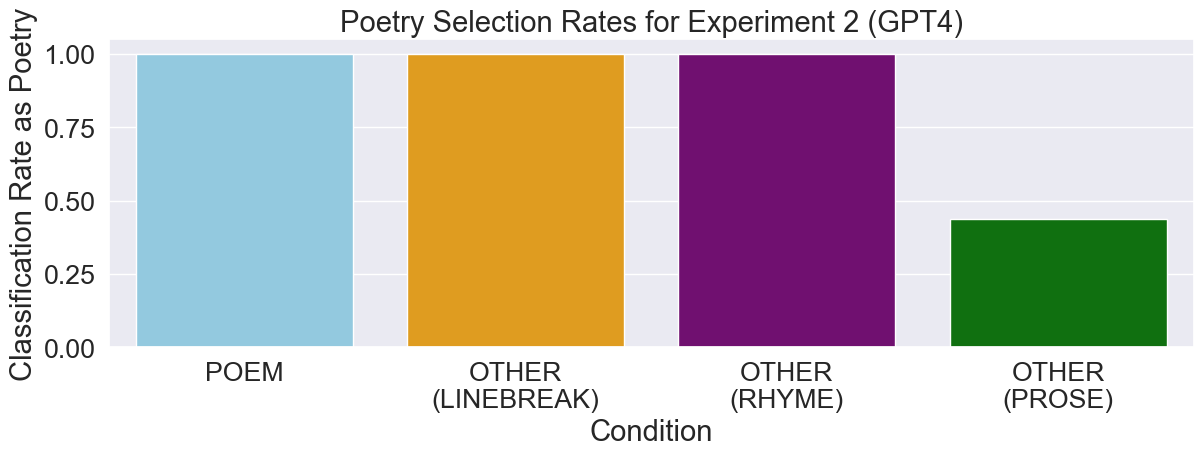

In [35]:
sns.barplot(x="Condition", y="Classification Rate as Poetry", data=exp2_plot, 
            order = ['POEM', 'OTHER\n(LINEBREAK)', 'OTHER\n(RHYME)', 'OTHER\n(PROSE)'])
plt.title("Poetry Selection Rates for Experiment 2 (GPT4)")
plt.savefig('exp2rates.png', dpi=300, bbox_inches='tight')